# Example

This notebook shows the output of functions defined in `utils/`.

This notebook can be run in a Python virtual environment. To create such an environment, run
```bash
bash$ cd path/to/contianing/folder
bash$ python3.11 -m venv ./venv
```

To enable the environment,
```bash
bash$ source venv/bin/activate
```

Next, install the required dependencies:
```bash
bash$ python -m pip install -r ./requirements.txt
```

Finally, this notebook can be opened and run in JupyterLab or Visual Studio Code.

# `utils/segment_image`

/home/self/Documents/page-segment/pipeline/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


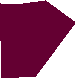

In [1]:
from utils.segment_image import crop_image_to_polygon, segment_image, combine_neighboring_lines
from PIL import Image, ImageEnhance

# Visual test: Cropping an image to a polygon
test_image = Image.new('RGB', (100, 100), color=(100, 0, 50))
crop_image_to_polygon(test_image, [(15, 15), (30, 16), (60, 12), (90, 34), (50, 88), (16, 90)])

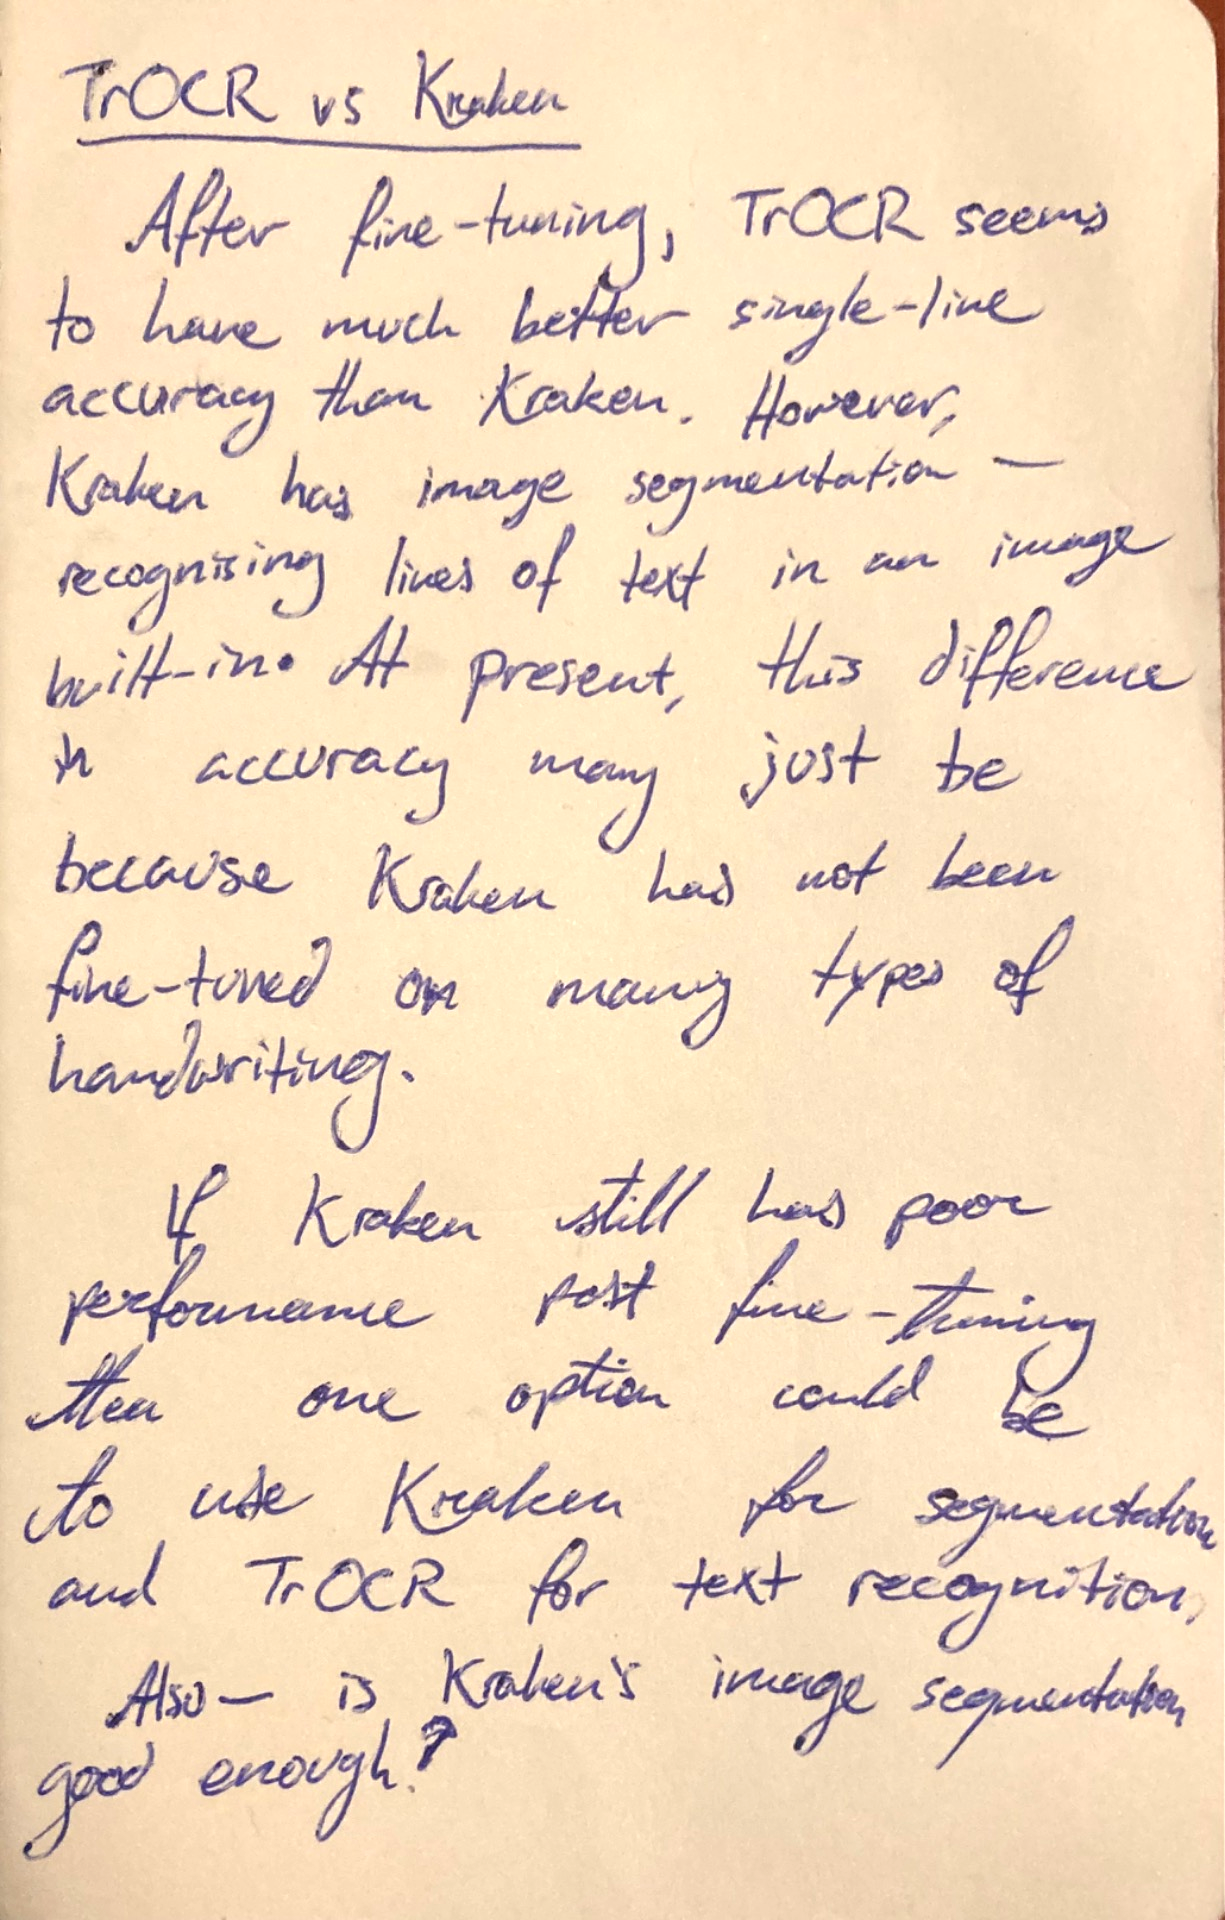

In [ ]:
def enhance(image: Image.Image):
	# image = ImageEnhance.Sharpness(image).enhance(4)
	# image = ImageEnhance.Contrast(image).enhance(2)
	# image = ImageEnhance.Color(image).enhance(0.5)
	# image = image.convert('L').convert('RGB') # Convert to grayscale
	return ImageEnhance.Brightness(image).enhance(1.2)

test_image = Image.open('../custom-samples/multi-line/text-lines-9.jpeg')
test_image = enhance(test_image)
test_image

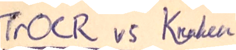

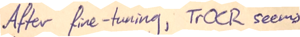

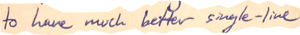

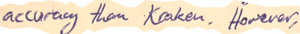

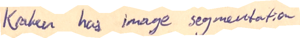

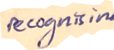

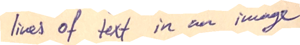

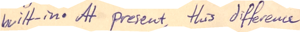

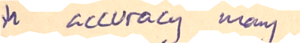

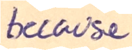

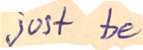

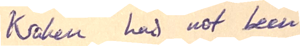

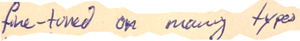

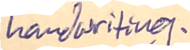

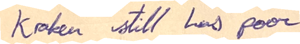

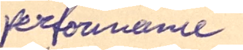

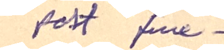

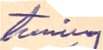

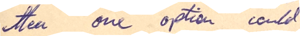

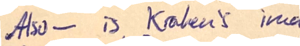

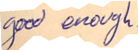

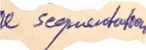

In [3]:
# For now, this uses the built-in Kraken page segmenter, which seems to only
# work well for mostly-full pages (as above).
recognised_lines = segment_image(test_image)
for line in recognised_lines:
	# Decrease the size of each image (makes embedding in this notebook
	# work better)
	line = line.copy()
	line.thumbnail((300, 50))

	display(line)

# `utils/TextRecogniser`

`utils.TextRecognizer` can be used to convert a full page of handwriting to text:

In [4]:
from utils.TextRecognizer import TextRecognizer

recognizer = TextRecognizer()

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 1024,
  "decode

In [ ]:
# Recognising English handwriting as French:
recognizer.recognize_lines(recognised_lines)

['TROCR vs Kmmbéi',
 'After fire-tuving, TOCR seems',
 'to have much betteu- single-linc',
 'accuracy than Koken. However,',
 'Korben his image sesmeutat:à',
 'reconts in',
 'lives of text in an image',
 'bût-in.At Present. Huis différence',
 'À accurately www',
 'belasse',
 'just te',
 'Keblien has not beein',
 'fine-tives! on nauz types',
 'bave limôt vue?',
 'le',
 'le',
 'Kreben, still! has peuer',
 'ferfounémie',
 'Porti-jeie-',
 'Messi-y',
 'Aten onx opition coulé!',
 'toute Kreibleu pène soguurbés',
 'aud TROCR for text recognition',
 'Alsi- ils Kaleux ine',
 'après eneign',
 'Il secusabether']

In [ ]:
print(recognizer.recognize_page(enhance(Image.open('./fr1.png'))))
print()
print(recognizer.recognize_page(enhance(Image.open('./fr2.png'))))

Scott Joplin, ne le 24 novembre 1888
Au lexas, est un plainiste et
compouteur atro-amtricain -- Bien
qu'ayant ecrit des oeures dans
plusieurs styles; y compris le
closoique et l'opéra, sa notorière
rient principalement à ses
compoutions de musique ragtime -
Sa musicalite, son talent et son
importance dans l'histoire du
plas hîni et de la musique
avavicaine. Sont exceptionnels
 --
À l'était à

Le Maple Leaf Ras, en la bems!
majeur, est un des raytimes de
Scott Joplin les plus connus avec le
colèbre. The Enverhainer
Le
Maple Leaf. Raj, a été compise
en 1899, peu après son 0rigins!
Roy qui, lui a été un échec.
Il est possible que ce ragtime
ait été nomme d'après le
Maple Leaf Club... un club où Scott
Joplin, venait régulièrement jouer-
 -J-F-
